In [14]:
!pip install scipy --upgrade

**Import Required Modules**

In [1]:
import time
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt

**Approximation with 12 uniform samples**

In [45]:
np.random.seed = 1
N = 1e6

def add_12_uni(n):
    return np.sum([np.random.uniform(0,1,12) for i in range(int(n))], axis=1) - 6

start_time = time.time()
x_uni = add_12_uni(N)
time_uni = round(time.time() - start_time,3)
print("Computation Time: ", time_uni)

Computation Time:  5.209


Mean     : 0.001
Std      : 1.0
Skew     : 0.002
Kurtosis : -0.1
Min/Max  : -4.43/4.41


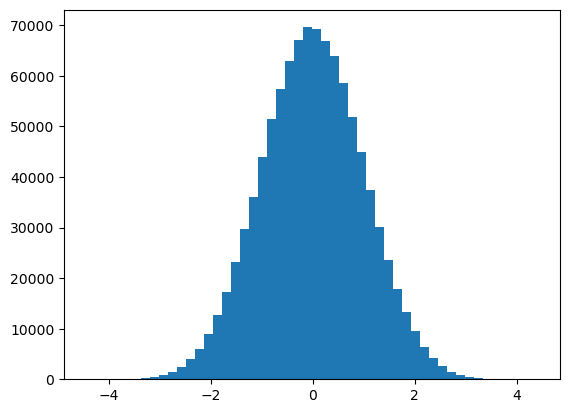

In [47]:
mean, std, skew, kurt = np.mean(x_uni), np.std(x_uni), stats.skew(x_uni), stats.kurtosis(x_uni)

print("Mean     :", round(mean,3))
print("Std      :", round(std,3))
print("Skew     :", round(skew,3))
print("Kurtosis :", round(kurt,3))
print("Min/Max  : {0}/{1}".format(round(min(x_uni),3), round(max(x_uni),3)))
plt.hist(x_uni, bins=50)
plt.show()

**Pseudo Method: Box-Muller transformation**

In [5]:
N = 1e6

def box_muller(n):
    n = int(int(n)/2)
    x_uni = np.random.uniform(0,1,(2,n))
    z1 = np.sqrt(-2*np.log(x_uni[0]))*np.cos(2*np.pi*x_uni[1])
    z2 = np.sqrt(-2*np.log(x_uni[0]))*np.sin(2*np.pi*x_uni[1])
    return np.concatenate((z1,z2))

start_time = time.time()
x_box = box_muller(N)
time_box = round(time.time() - start_time,3)
print("Computation Time: ", time_box)

Computation Time:  0.068


C:\Users\matth\AppData\Local\Temp\ipykernel_22664\691412396.py:1: DeprecationWarning: Please import `skew` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  mean, std, skew, kurt = np.mean(x_box), np.std(x_box), stats.stats.skew(x_box), stats.kurtosis(x_box)


Mean     : 0.001
Std      : 1.001
Skew     : 0.002
Kurtosis : -0.004
Min/Max  : -4.551/5.331


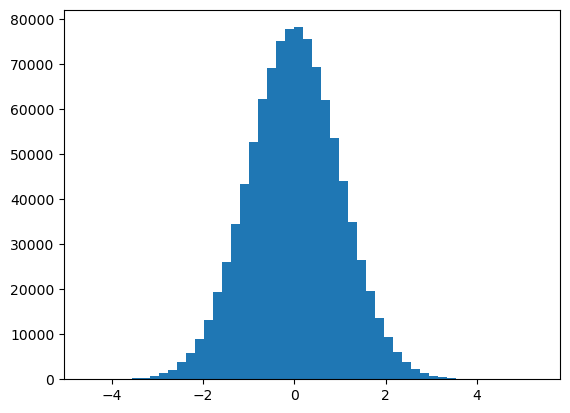

In [7]:
mean, std, skew, kurt = np.mean(x_box), np.std(x_box), stats.stats.skew(x_box), stats.kurtosis(x_box)

print("Mean     :", round(mean,3))
print("Std      :", round(std,3))
print("Skew     :", round(skew,3))
print("Kurtosis :", round(kurt,3))
print("Min/Max  : {0}/{1}".format(round(min(x_box),3), round(max(x_box),3)))
plt.hist(x_box, bins=50)
plt.show()

**Pseudo Method 2: Inverse transform sampling**

Let U be a random variable which is uniformly distributed on the interval $[0,1]$. And let $F$ be a continuous CDF(cumulative distribution function) of a random variable, $X$, which we want to generate. Then, inverse CDF is defined by:

$F^{-1}(u) = inf\{x|F(x)\leq u, u \in [0,1]\}$

Using this inverse CDF, we can generate random variable X as following:

$X < -F^{-1}(u)$



In [10]:
N = 1e6

def inverse_norm(n):
    x_uni = np.random.uniform(0,1,int(n))
    return stats.norm.ppf(x_uni)

start_time = time.time()
x_inv = inverse_norm(N)
time_inv = round(time.time() - start_time,3)
print("Computation Time: ", time_inv)

Computation Time:  0.11


Mean     : 0.001
Std      : 1.0
Skew     : -0.001
Kurtosis : -0.004
Min/Max  : -5.054/4.837


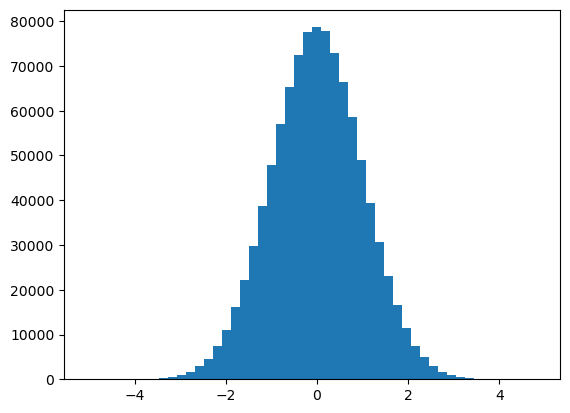

In [12]:
mean, std, skew, kurt = np.mean(x_inv), np.std(x_inv), stats.skew(x_inv), stats.kurtosis(x_inv)

print("Mean     :", round(mean,3))
print("Std      :", round(std,3))
print("Skew     :", round(skew,3))
print("Kurtosis :", round(kurt,3))
print("Min/Max  : {0}/{1}".format(round(min(x_inv),3), round(max(x_inv),3)))
plt.hist(x_inv, bins=50)
plt.show()

**Pseudo-random Numbers**

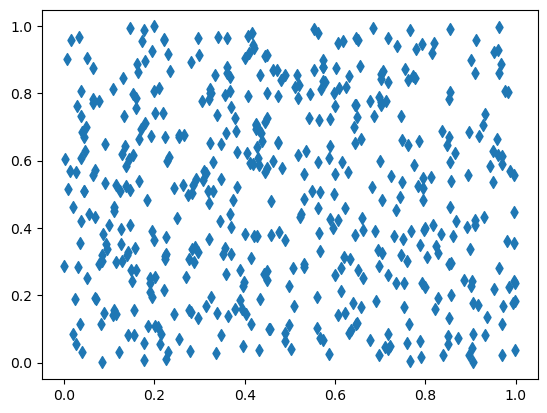

In [36]:
n = 500
x1 = np.random.uniform(0,1,int(n))
x2 = np.random.uniform(0,1,int(n))

plt.scatter(x1,x2, marker='d')
plt.show()

**Quasi-random numbers**

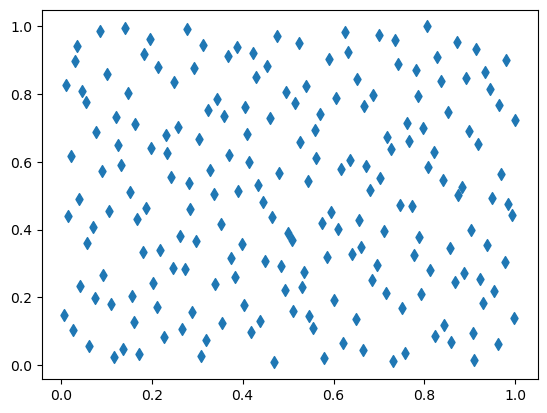

In [33]:
from scipy.stats import qmc

def halton(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    return sampler.random(n)

def halton_norm(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    x_halton = sampler.random(n)
    return stats.norm.ppf(x_halton)

x = halton(n=200, d=2).T
plt.scatter(x[0],x[1], marker='d')

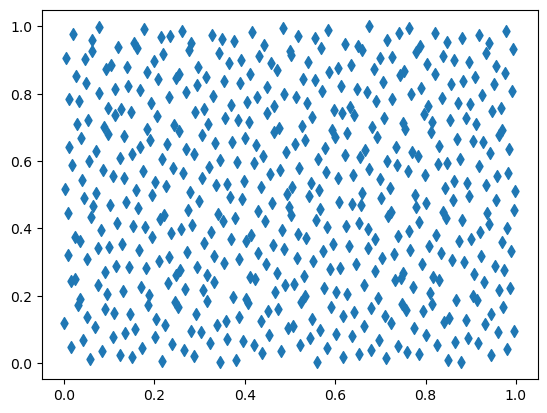

In [38]:
def sobol(m, d=1):
    sampler = qmc.Sobol(d, scramble=True)
    return sampler.random_base2(m)

def sobol_norm(m, d=1):
    sampler = qmc.Sobol(d, scramble=True)
    x_sobol = sampler.random_base2(m)
    return stats.norm.ppf(x_sobol)

x = sobol(m=9, d=2).T
plt.scatter(x[0],x[1], marker='d')

In [40]:
# Define variables
r = 0.01
S0 = 30
K = 32
T = 240/365
vol = 0.30

def blackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*stats.norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*stats.norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*stats.norm.cdf(-d2, 0, 1) - S*stats.norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")


bs = blackScholes(r, S0, K, T, vol, type="c")
print('Black Scholes Price', round(bs,3))

Black Scholes Price 2.18


In [51]:
results = {'Pseudo: add_12_uni': [],
           'Pseudo: box_muller': [],
           'Pseudo: inv_transform': [],
           'Quasi : Halton': [],
           'Quasi : Sobol': [],}

funcs = {'Pseudo: add_12_uni': add_12_uni,
         'Pseudo: box_muller': box_muller,
         'Pseudo: inv_transform': inverse_norm,
         'Quasi : Halton': halton_norm,
         'Quasi : Sobol': sobol_norm}

numbers = np.linspace(0,4000,21)[1:]
# N = 10000

#precompute constants
dt = T
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)

# Monte Carlo Method
for M in numbers:
    M = int(M)
    for method in results:
        if method == 'Quasi : Sobol':
            continue
        else:
            Z = funcs[method](M)
        delta_St = nudt + volsdt*Z
        ST = S0*np.exp(delta_St)
        CT = np.maximum(0, ST - K)
        C0 = np.exp(-r*T)*np.sum(CT)/M

        results[method].append(C0 - bs)

sobol_rng = np.arange(7,13)
for M in sobol_rng:
    M = int(M)

    Z = funcs['Quasi : Sobol'](M)
    delta_St = nudt + volsdt*Z
    ST = S0*np.exp(delta_St)
    CT = np.maximum(0, ST - K)
    C0 = np.exp(-r*T)*np.sum(CT)/(2**M)

    results['Quasi : Sobol'].append(C0 - bs)


sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
SE = sigma/np.sqrt(M)

[]

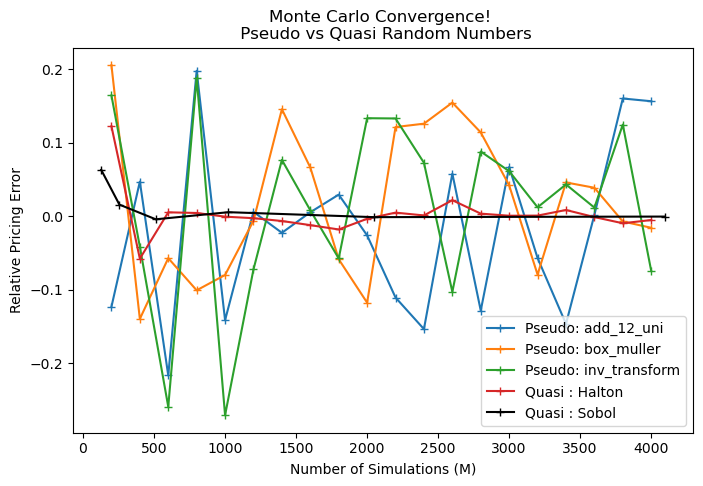

In [55]:
plt.figure(figsize=(8,5))
for method in results:
    if method == 'Quasi : Sobol':
        plt.plot(2**sobol_rng,results[method],label=method,color='k',marker='+')
    else:
        plt.plot(numbers,results[method],label=method,marker='+')
plt.legend()
plt.title('Monte Carlo Convergence! \n Pseudo vs Quasi Random Numbers')
plt.ylabel('Relative Pricing Error')
plt.xlabel('Number of Simulations (M)')
plt.plot()